# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

In [42]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:

def download_csv_from_github(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            file.write(response.content)
        print(f"CSV file downloaded successfully to '{save_path}'")
    else:
        print("Failed to download CSV file")

url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv'

local_file_path = 'financial_news_headlines_sentiment.csv'

download_csv_from_github(url, local_file_path)

CSV file downloaded successfully to 'financial_news_headlines_sentiment.csv'


## 2. Load the dataset [1 point]

In [44]:
df = pd.read_csv(url, encoding='ISO-8859-1')

## 3. Explore the dataset [10 points]

In [45]:
df.columns = ['sentiment', 'headline']

In [46]:
print(df.shape)


(4845, 2)


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   headline   4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [48]:
print(df.describe())

       sentiment                                           headline
count       4845                                               4845
unique         3                                               4837
top      neutral  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq        2878                                                  2


In [49]:
print(df.head())

  sentiment                                           headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64
480     Calls to the switchboard and directory service...
3548    Cargotec 's business areas also include the co...
1584    Quality chargers under CHARGZ brand are sold i...
4596    The Finnish national carrier said net loss in ...
2655    The new majority owners of Aspocomp Thailand C...
Name: headline, dtype: object


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


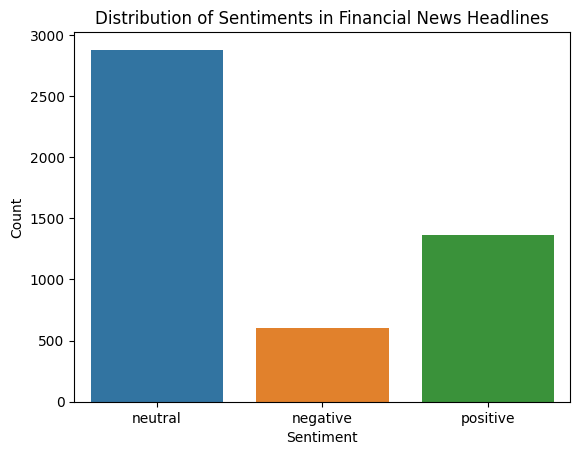

sentiment    0
headline     0
dtype: int64
sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64
2920          Gearing was 43 % compared to 67 % in 2004 .
4200    In December , Amer announced the dismissal of ...
4042    Pretax loss totalled EUR 49.9 mn , compared to...
2159    Net sales in 2006 totaled EUR 302 million and ...
2434    Digia will also set up two subsidiaries , Digi...
Name: headline, dtype: object


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


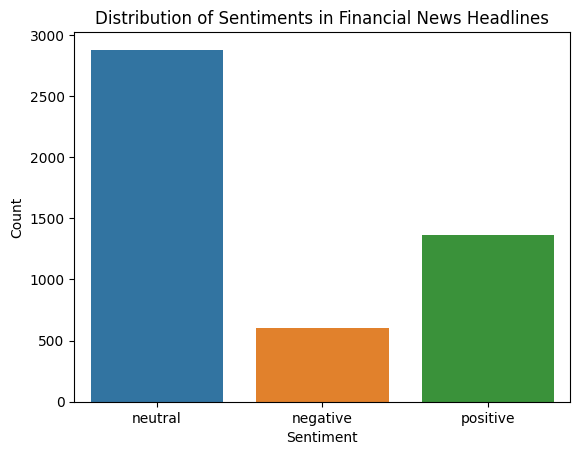

In [50]:
if 'sentiment' in df.columns:
    # Distribution of sentiments
    print(df['sentiment'].value_counts())

    # Displaying some sample headlines
    print(df['headline'].sample(5))

    # Display count plot of sentiments
    import matplotlib.pyplot as plt

    sns.countplot(x='sentiment', data=df)
    plt.title('Distribution of Sentiments in Financial News Headlines')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
else:
    print("The 'sentiment' column does not exist in the dataset.")
print(df.isnull().sum())

# Distribution of sentiments
print(df['sentiment'].value_counts())

# Displaying some sample headlines
print(df['headline'].sample(5))

# Display count plot of sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments in Financial News Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 4. Clean the data [5 points]

In [51]:
print(df.isnull().sum())

sentiment    0
headline     0
dtype: int64


In [52]:
df.dropna(inplace=True) 

In [53]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

6


In [54]:
df.to_csv('cleaned_financial_news_headlines_sentiment.csv', index=False)

## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Separate the features and target variable
X = df['headline']
y = df['sentiment']

# Convert the text data into numerical vectors
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Encode the target variable as numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y_encoded)

# Decode the target variable back to original labels
y_resampled_decoded = label_encoder.inverse_transform(y_resampled)

# Print the balanced dataset
balanced_df = pd.DataFrame({'headline': X_resampled, 'sentiment': y_resampled_decoded})
print(balanced_df)

                                               headline sentiment
0       (0, 7897)\t0.10801936497051902\n  (0, 8569)\...   neutral
1       (0, 7605)\t0.16926000761217144\n  (0, 7001)\...  negative
2       (0, 7143)\t0.22889360312006926\n  (0, 9074)\...  positive
3       (0, 48)\t0.15986332689695976\n  (0, 5701)\t0...  positive
4       (0, 6721)\t0.24194631429196847\n  (0, 1602)\...  positive
...                                                 ...       ...
8611    (0, 7897)\t0.04371397881953746\n  (0, 6422)\...  positive
8612    (0, 4622)\t0.10205618003079323\n  (0, 1075)\...  positive
8613    (0, 9886)\t0.0979020338926416\n  (0, 5716)\t...  positive
8614    (0, 9164)\t0.058493731181200756\n  (0, 3981)...  positive
8615    (0, 9164)\t0.07332216830835687\n  (0, 6374)\...  positive

[8616 rows x 2 columns]


## 6. BoW model [15 points]

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# Check if 'df' DataFrame exists
if 'df' in locals():
    # Check if 'headline' column exists in the DataFrame
    if 'headline' in df.columns:
        # Define the variable X
        X = df['headline']

        # Create an instance of CountVectorizer
        vectorizer = CountVectorizer()

        # Fit the vectorizer on the text data
        X_bow = vectorizer.fit_transform(X)

        # Print the feature names using the correct method
        print(vectorizer.get_feature_names_out())

        # Print the BoW representation of the text data
        print(X_bow.toarray())
    else:
        print("The 'headline' column does not exist in the DataFrame.")


['00' '000' '000063' ... 'æskyl' 'ætehuolto' 'ðl']
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 7. Tf-idf model [15 points]

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Check if 'df' DataFrame exists
if 'df' in locals():
    # Check if 'headline' column exists in the DataFrame
    if 'headline' in df.columns:
        # Define the variable X
        X = df['headline']

        # Create an instance of TfidfVectorizer
        vectorizer = TfidfVectorizer()

        # Fit the vectorizer on the text data
        X_tfidf = vectorizer.fit_transform(X)

        # Print the feature names using the correct method
        print(vectorizer.get_feature_names_out())

        # Print the Tf-idf representation of the text data
        print(X_tfidf.toarray())
    else:
        print("The 'headline' column does not exist in the DataFrame.")


['00' '000' '000063' ... 'æskyl' 'ætehuolto' 'ðl']
[[0.        0.1469503 0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


## 8. Split train test data [3 points]

In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_decoded, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6892, 10070) (6892,)
Testing set shape: (1724, 10070) (1724,)


## 9. Classification Algorithm [10 points]
- Train
- Predict

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Import the necessary libraries

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_decoded, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Show the result
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result)


Accuracy: 0.8126450116009281
        Actual Predicted
0      neutral   neutral
1     positive  positive
2     negative   neutral
3     negative  negative
4     negative  negative
...        ...       ...
1719   neutral   neutral
1720  negative  negative
1721  negative  negative
1722   neutral   neutral
1723   neutral   neutral

[1724 rows x 2 columns]


## 10. Another Classification Algorithm [10 points]
- Train
- Predict

Accuracy: 0.8973317865429234


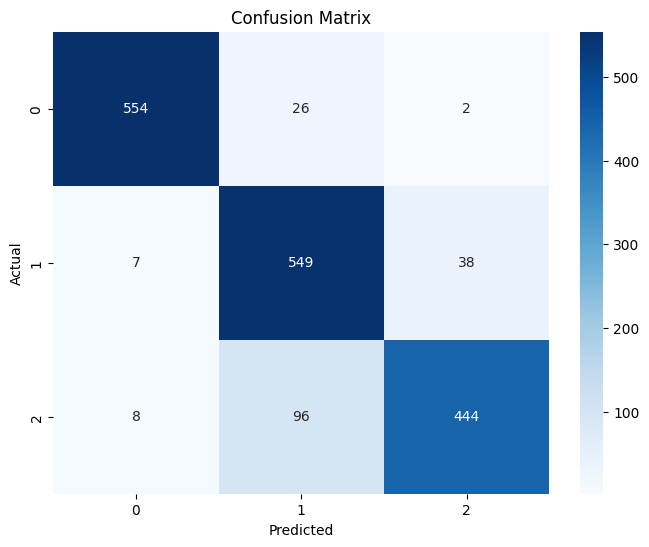

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_decoded, test_size=0.2, random_state=42)

# Create an instance of the Random Forest Classifier
clf = RandomForestClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming 'finnews' DataFrame and 'headline' column exist
X = df['headline']
y = df['sentiment'] # Replace with your sentiment column name

# BoW Vectorization
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(X)

# TF-IDF Vectorization
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(X)

# Splitting the data into training and testing sets for both BoW and TF-IDF
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Now you can proceed with training your classifiers as you've written in your code.
